In [2]:
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns
from pathlib import Path
import urllib.request

In [3]:
# Function to download, extract, and load CSV from tgz file
def load_housing_data(url, save_dir):
    try:
        # Construct paths
        save_dir = Path(save_dir)
        tarball_path = save_dir / "housing.tgz"
        
        # Check if tarball exists, if not download it
        if not tarball_path.is_file():
            save_dir.mkdir(parents=True, exist_ok=True)
            urllib.request.urlretrieve(url, tarball_path)
        
        # Extract CSV from tgz file
        with tarfile.open(tarball_path, 'r:gz') as tar:
            # Find the CSV file (assuming it's directly in the archive)
            csv_file = [member for member in tar.getmembers() if member.name.endswith('.csv')][0]
            tar.extract(csv_file, path=save_dir)
            
            # Load CSV into Pandas DataFrame
            csv_path = save_dir / csv_file.name
            df = pd.read_csv(csv_path)
            
            print(f"CSV file {csv_file.name} extracted and loaded successfully.")
            return df
    except Exception as e:
        print(f"Error extracting or loading CSV: {e}")
        return None

In [4]:
url = "https://github.com/ageron/data/raw/main/housing.tgz"
save_dir = "C:/Users/Kaiyu/Desktop/Data Science Projects/Housing/datasets"  
# Adjust this path as per your desktop folder structure

housing = load_housing_data(url, save_dir)



CSV file housing/housing.csv extracted and loaded successfully.


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [9]:
import matplotlib.pyplot as plt

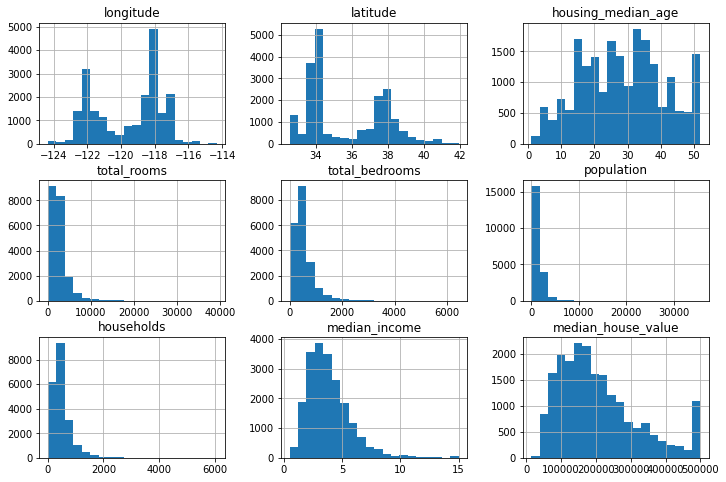

In [10]:
housing.hist(bins=20, figsize=(12,8))
plt.show()

median_income and housing_median_age are capped.  
Either collect proper labels for those labels that are capped or remove them from our data set.

Most histograms show that the data is skewed right (the tail of distribution extends to the right).

### Splitting the Data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [13]:
strat_train, strat_test = train_test_split(housing, test_size=0.2, stratify=housing['income_cat'], random_state=42)

In [14]:
strat_train['income_cat'].value_counts()/len(strat_train)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [15]:
strat_test['income_cat'].value_counts()/len(strat_test)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [16]:
for dataset in (strat_train, strat_test):
    dataset.drop('income_cat', axis=1, inplace=True)

In [17]:
strat_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


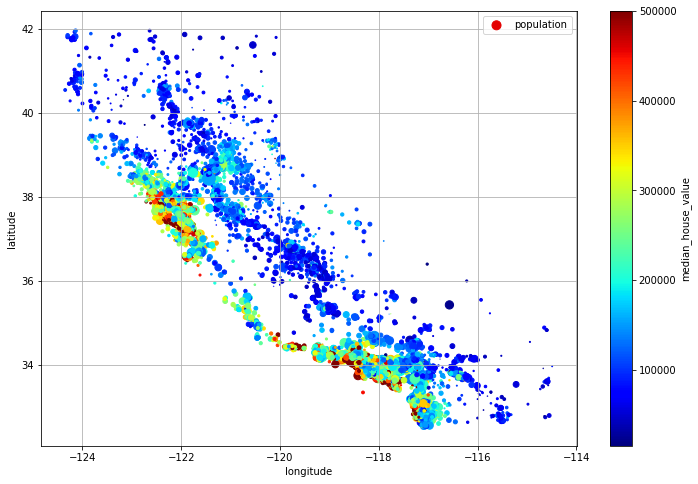

In [18]:
strat_train.plot(kind='scatter', x='longitude', y='latitude', grid=True, s=strat_train['population']/100, label='population',
                 c='median_house_value', cmap='jet', colorbar=True, legend=True, sharex=False, figsize=(12, 8))

plt.show()

In [19]:
strat_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [20]:
strat_train.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

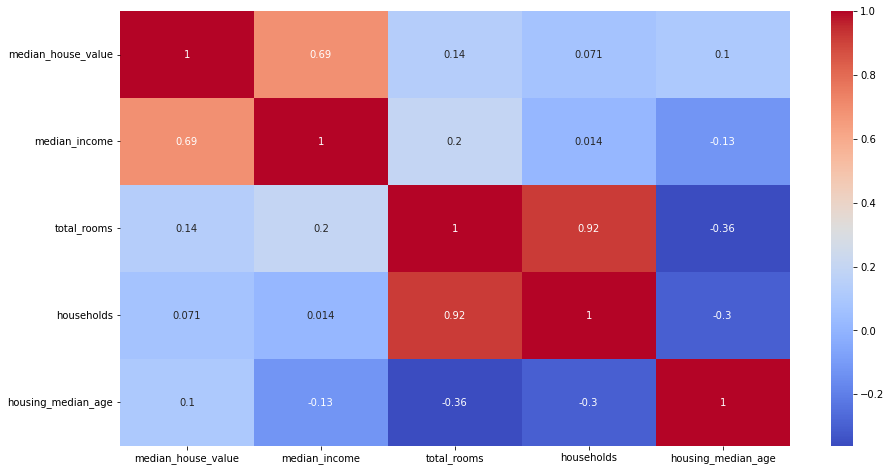

In [21]:
plt.figure(figsize=(15,8))

corr_columns = ['median_house_value', 'median_income', 'total_rooms', 'households', 'housing_median_age']

sns.heatmap(strat_train[corr_columns].corr(), annot=True, cmap='coolwarm')

plt.show()

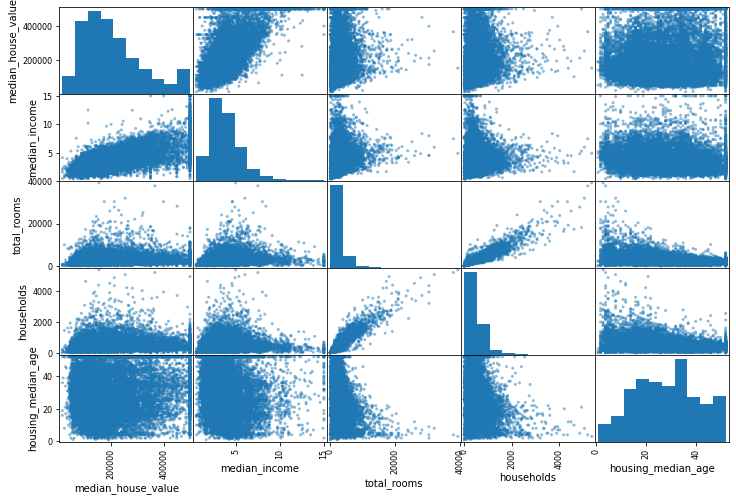

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(strat_train[corr_columns], figsize=(12,8))

plt.show()

In [23]:
strat_train['rooms_per_house'] = strat_train['total_rooms'] / strat_train['households']
strat_train['bedrooms_ratio'] = strat_train['total_bedrooms'] / strat_train['total_rooms']
strat_train['people_per_house'] = strat_train['population'] / strat_train['households']

In [24]:
strat_train.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [25]:
strat_train.drop(['rooms_per_house', 'bedrooms_ratio', 'people_per_house'], axis=1, inplace=True)

In [26]:
strat_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


# Preparing the Data for Machine Learning Algorithms

Separate the predictors and the labels since we don't necessarily want to apply the same transformations to the predictors and the target values.

In [27]:
housing = strat_train.drop('median_house_value', axis=1)
housing_labels = strat_train['median_house_value'].copy()

Clean the data

In [28]:
from sklearn.impute import SimpleImputer

We use the imputer is because it will store the median value of each feature: this will make it possible to impute missing values not only in the training set, but also the validation set, the test set, and any new data fed to the model.

In [29]:
imputer = SimpleImputer(strategy='median')

Since the median can only be computedon numerical attributes, you then need to create a copy of the data with only the numerical attributes (this will exclude the text attribute ocean_proximity):

In [30]:
housing_num = housing.select_dtypes(include=[np.number])

Now you can fit the imputer instance to the training data using the fit() method:

In [31]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

What imputer.fit() is doing is that it has computed the median of each attribute and stored the result in its statistics_ instance variable.

Despite that only the total_bedrooms attribute had misisng values, you cannot be sure that there won't be any missing values in new data after the system goes live, so it is safe to apply the imputer to all numberical attributes.

In [32]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [33]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Now we can use this "trained" imputer to transform the training set by replacing missing values with the learned medians:

In [34]:
X = imputer.transform(housing_num)

Scikit-Learn transformers(such as SimpleImputer) output NumPy arrays even when they are fed Pandas dataframe as input.

X in this case is just a NumPy array, so we will need to convert it back into a Pandas dataframe:

In [35]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [36]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [37]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     7274
INLAND        5301
NEAR OCEAN    2089
NEAR BAY      1846
ISLAND           2
Name: ocean_proximity, dtype: int64

In [38]:
housing_cat = housing[['ocean_proximity']]

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
ohe = OneHotEncoder()

housing_cat_ohe = ohe.fit_transform(housing_cat)

In [41]:
housing_cat_ohe

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [42]:
housing_cat_ohe.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [43]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [44]:
ohe.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [45]:
ohe.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [46]:
from sklearn.preprocessing import FunctionTransformer

In [47]:
log_transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1)

In [48]:
log_pop = log_transformer.transform(housing[['housing_median_age']])

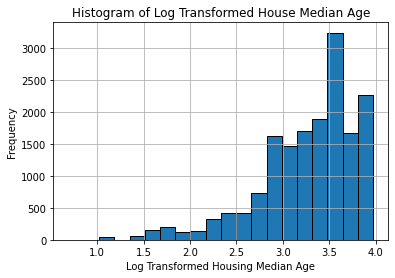

In [49]:
# Plotting the histogram of the transformed data
plt.hist(log_pop, bins=20, edgecolor='black')
plt.xlabel('Log Transformed Housing Median Age')
plt.ylabel('Frequency')
plt.title('Histogram of Log Transformed House Median Age')
plt.grid(True)
plt.show()

In [50]:
original_pop = log_transformer.inverse_transform(log_pop)

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [52]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

In [53]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [54]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [55]:
df_housing_num_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365


To apply appropriate transformations to categorical and numerical columns in a single transformer, use ColumnTransformer.

In [56]:
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer

It might be tedious to list all the columns names, Scikit_Lean provides a make_column_selector() funtion that returns a selector function you can use to automatically select all the features of a given type, such as numerical or categorical.  

If you don't care about naming the transformers in a ColumnTransformer, you can use the make_column_transformer().

In [57]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore'))

# we're using the num_pipeline we've built above this.

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)



# The explicit way of doing this would be:

# num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
# cat_attribs = ['ocean_proximity']

# cat_pipeline = make_pipeline(
#     SimpleImputer(strategy='most_frequent'),
#     OneHotEncoder(handle_unknown='ignore'))

# preprocessing = ColumnTransformer([
#     ('num', num_pipeline, num_attribs),
#     ('cat', cat_pipeline, cat_attribs),
# ])

Now let's put all the transformations that we've learned into one big chunk of code.

In [58]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ['ratio']  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log1p, inverse_func=np.expm1, feature_names_out='one-to-one'),
    StandardScaler())

# cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler())


preprocessing = ColumnTransformer([
    ('bedrooms', ratio_pipeline(), ['total_bedrooms', 'total_rooms']),
    ('rooms_per_house', ratio_pipeline(), ['total_bedrooms', 'households']),
    ('people_per_house', ratio_pipeline(), ['population', 'households']),
    ('log', log_pipeline, ['total_bedrooms', 'total_rooms', 'households', 'population', 'median_income']), 
#    ('geo', cluster_simil, ['latitude', 'longitude']),
    ('cat', cat_pipeline, make_column_selector(dtype_include = object))
],
remainder = default_num_pipeline)



In [59]:
housing_prepared = preprocessing.fit_transform(housing)

In [60]:
housing_prepared.shape

(16512, 16)

In [61]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__households', 'log__population',
       'log__median_income', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__longitude', 'remainder__latitude',
       'remainder__housing_median_age'], dtype=object)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'households',
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002641453D700>)])),
                ('linearregression', LinearRegression())])

In [64]:
# we don't use iloc here because the output after transformations is a matrix (or 2D array).
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([259700., 363600., 121000., 105000., 300100.])

In [65]:
# we use iloc here because housing_labels is a dataframe
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
# squared=False returns Root Mean Squared Error. 
# Root Mean Squared Error is preferred as it provides an error metric in the same units as the original data.

lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)

In [68]:
lin_rmse

68731.63335533802

What this number is saying is that we have a prediction error of `$68,731`.  This is not good since `median_housing_values` ranges from `$120,000` to `$265,000`, which means that we are underfitting the training data.

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'total_rooms', 'households',
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002641453D700>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [71]:
housing_predictions =tree_reg.predict(housing)

In [72]:
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)

In [73]:
tree_rmse

0.0

Usually, we would have to use train_test_split function to split our training data to perform cross validation.  

However, scikit learn has a k fold cross validatoin feature, `cross_val_score`.  `cross_val_score` randomly splits the training set into 10 nonoverlapping subsets called folds, then it trains and evaluates the decisiong tree 10 times, picking a different fold for evaluation every time and using the 9 other folds for training.  

The result is an array containing the 10 evaluation scores.

**Use `cross_val_score` if you want to evaluate how well your model performs on different folds of the data.**

**Use `GridSearchCV` if you want to find the best hyperparameters for your model.**

In [74]:
from sklearn.model_selection import cross_val_score

cross_val_score expects a utility function where greater is better rather than a cost function where lower is better.  So the scoring_type parameter is actually the opposite of the RMSE, hence, neg_root_mean_squared_error.  Given that using neg_root_mean_squared_error would result in a negative cross validation score, we need to add a negative (-) sign before the cross_val_score function to make the output positive.

**cross_val_score format:**

**cross_val_score(model, X, y, scoring_type, cv = #_of_folds)**


score types include 'neg_root_mean_squared_error', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', etc.

In [75]:
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)

In [76]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     71096.934040
std       2208.702685
min      67702.548909
25%      70122.632908
50%      70433.694880
75%      72766.135687
max      74292.631114
dtype: float64

Decision tree didn't look as good as it did earlier.  In fact, it seems to have performed worse than the regression model.

The decision tree hsa an RMSE of 71,096, with a standard deviation of 2,208. 

Thee issue with cross validation is that it is computationally expensive as it trains the model several times.

Having 0 RMSE for our training error earlier indicates that our decision tree model is overfitting.

Let's try Random Forest.

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

In [79]:
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)

In [80]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     49935.311726
std       1013.609667
min      47928.444933
25%      49491.696092
50%      49987.707672
75%      50496.193210
max      51663.056220
dtype: float64

In [81]:
import xgboost as xgb

In [82]:
xgb_reg = make_pipeline(preprocessing, xgb.XGBRegressor(random_state=42))

In [83]:
xgb_rmses = -cross_val_score(xgb_reg, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)

In [84]:
pd.Series(xgb_rmses).describe()

count       10.000000
mean     46556.107091
std       1065.224340
min      45031.516777
25%      46011.721710
50%      46390.183320
75%      46718.578355
max      48535.843994
dtype: float64

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [86]:
full_pipeline_xgb = Pipeline([
    ('preprocessing', preprocessing),
    ('xgb', xgb.XGBRegressor(random_state=42)),
])

In [87]:
param_grid_xgb = [
    {'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__reg_alpha': [0, 0.001, 0.01],
    'xgb__reg_lambda': [0, 0.001, 0.01]}
]

In [88]:
grid_search_xgb = GridSearchCV(full_pipeline_xgb, param_grid_xgb, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)

In [89]:
grid_search_xgb.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid=[{'xgb__max_depth': [3, 5, 7],
                          'xgb__n_estimators': [50, 100, 200],
                          'xgb__reg_alpha': [0, 0.001, 0.01],
                          'xgb__reg_lambda': [0, 0.001, 0.01]}],
             scoring='neg_root_mean_squared_error')

In [90]:
grid_search_xgb.best_params_

{'xgb__max_depth': 5,
 'xgb__n_estimators': 200,
 'xgb__reg_alpha': 0.01,
 'xgb__reg_lambda': 0.01}

In [91]:
cv_res_xgb = pd.DataFrame(grid_search_xgb.cv_results_)
cv_res_xgb['mean_test_score'] = -cv_res_xgb['mean_test_score']


In [92]:
cv_res_xgb.sort_values(by='mean_test_score', ascending=True, inplace=True)

In [93]:
cv_res_xgb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgb__max_depth,param_xgb__n_estimators,param_xgb__reg_alpha,param_xgb__reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
53,1.514167,0.042877,0.144243,0.028020,5,200,0.01,0.01,"{'xgb__max_depth': 5, 'xgb__n_estimators': 200...",-47607.675581,-47700.371694,-47843.334565,47717.127280,96.934175,1
47,1.561171,0.068675,0.175197,0.007540,5,200,0,0.01,"{'xgb__max_depth': 5, 'xgb__n_estimators': 200...",-47607.675058,-47700.372303,-47843.335088,47717.127483,96.934564,2
50,1.511995,0.099465,0.162057,0.008369,5,200,0.001,0.01,"{'xgb__max_depth': 5, 'xgb__n_estimators': 200...",-47607.676381,-47700.372179,-47843.333928,47717.127496,96.933570,3
51,1.552694,0.098600,0.168747,0.020611,5,200,0.01,0,"{'xgb__max_depth': 5, 'xgb__n_estimators': 200...",-47335.194170,-47762.051857,-48231.265559,47776.170528,365.955814,4
45,1.680464,0.244713,0.154281,0.006826,5,200,0,0,"{'xgb__max_depth': 5, 'xgb__n_estimators': 200...",-47335.193683,-47762.051907,-48231.266478,47776.170689,365.956389,5


In [94]:
full_pipeline_rf = Pipeline([
    ('preprocessing', preprocessing),
    ('rf', RandomForestRegressor(random_state=42)),
])

In [95]:
param_grid_rf = [
    {'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [3, 5, 7],
    'rf__max_features': [4, 6, 10]}
]

In [96]:
grid_search_rf = GridSearchCV(full_pipeline_rf, param_grid_rf, cv=3, scoring='neg_root_mean_squared_error')

In [97]:
grid_search_rf.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002641453D700>)])),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'rf__max_depth': [3, 5, 7],
                          'rf__max_features': [4, 6, 10],
                          'rf__n_estimators': [50, 100, 200]}],
             scoring='neg_root_mean_squared_error')

In [98]:
grid_search_rf.best_params_

{'rf__max_depth': 7, 'rf__max_features': 10, 'rf__n_estimators': 200}

In [99]:
grid_search_rf.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000026...
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002641809D790>)])),
                ('rf',
                 RandomForestRegressor(max_depth=7, max_features=10,
                                       n_estimators=200, random_state=42))])

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [101]:
param_distribs = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [3, 5, 7],
    'rf__max_features': randint(low=2, high=20)
}

In [102]:
rnd_search = RandomizedSearchCV(
    full_pipeline_rf, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

In [103]:
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x000002641453D700>)])),
                                             ('rf',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'rf__max_depth': [3, 5, 7],
                                        'rf__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002641809F9D0>,
                                        'rf__n_estimators': [50, 100, 200]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [104]:
rnd_search.best_params_

{'rf__max_depth': 7, 'rf__max_features': 12, 'rf__n_estimators': 200}

In [105]:
final_model = rnd_search.best_estimator_

In [106]:
feature_importances = final_model['rf'].feature_importances_

In [107]:
feature_importances.round(2)

array([0.03, 0.01, 0.12, 0.  , 0.  , 0.  , 0.  , 0.54, 0.  , 0.21, 0.  ,
       0.  , 0.  , 0.03, 0.03, 0.03])

In [108]:
sorted(zip(feature_importances, final_model['preprocessing'].get_feature_names_out()), reverse=True)

[(0.5448942537601932, 'log__median_income'),
 (0.20619605691480883, 'cat__ocean_proximity_INLAND'),
 (0.11820315967429104, 'people_per_house__ratio'),
 (0.030764038185474157, 'remainder__longitude'),
 (0.029869426684509114, 'remainder__housing_median_age'),
 (0.026990801820302928, 'bedrooms__ratio'),
 (0.026143047587750597, 'remainder__latitude'),
 (0.00558222869296721, 'rooms_per_house__ratio'),
 (0.0026353123319193404, 'log__total_rooms'),
 (0.002283315483186701, 'log__total_bedrooms'),
 (0.002014899389966417, 'log__households'),
 (0.0018673272044998984, 'log__population'),
 (0.001657620309465188, 'cat__ocean_proximity_<1H OCEAN'),
 (0.0006577962571853674, 'cat__ocean_proximity_NEAR OCEAN'),
 (0.00020892476067125513, 'cat__ocean_proximity_NEAR BAY'),
 (3.179094280878379e-05, 'cat__ocean_proximity_ISLAND')]

In [109]:
X_test = strat_test.drop('median_house_value',axis=1)

In [111]:
y_test = strat_test['median_house_value'].copy()

In [112]:
final_predictions = final_model.predict(X_test)

In [113]:
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

58142.449816186294


In [114]:
from scipy import stats

In [115]:
confidence = 0.95

In [118]:
squared_errors = (final_predictions - y_test) ** 2

95% confidence interval of the generalization error:

In [121]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc = squared_errors.mean(), scale=stats.sem(squared_errors)))

array([55735.83533607, 60453.33407386])

Say we got approved to deploy our model.  The most basic way to do this is just to save the best model you trained, transfer the file to your production environment and load it.

In [122]:
import joblib

In [123]:
joblib.dump(final_model, 'cali_housing_model.pkl')

['cali_housing_model.pkl']

Once your model is transferred to production, you can load it and use it.  

For this you must first import any custom classes and functions the model relies on (which means transferring the code to production), then load the model using joblib and use it to make predictions.

In [124]:
# final_model_reloaded = joblib.load('cali_housing_model.pkl')